In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import KFold
from sklearn.cross_validation import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import cross_validation
from sklearn.linear_model import LogisticRegression

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

genderclassmodel.csv
gendermodel.csv
gendermodel.py
myfirstforest.py
test.csv
train.csv



/opt/conda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
titanic=pd.read_csv('../input/train.csv')
print(titanic.head())
titanic.describe()

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4c5a1c1940>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f4c59e235c0>]], dtype=object)

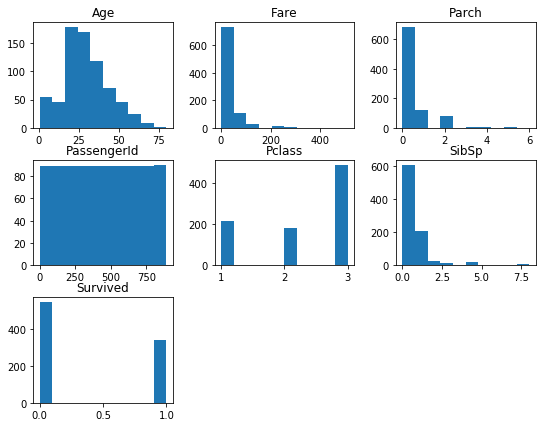

In [3]:
titanic.hist(bins=10,figsize = (9,7), grid = False)

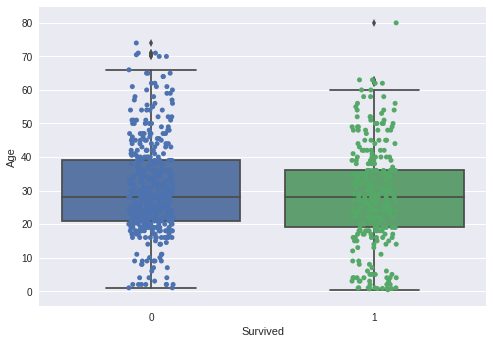

In [4]:
import seaborn as sns
ax = sns.boxplot(x="Survived",y="Age",data=titanic)
ax = sns.stripplot(x="Survived",y="Age", data= titanic, jitter = True)
sns.plt.show()

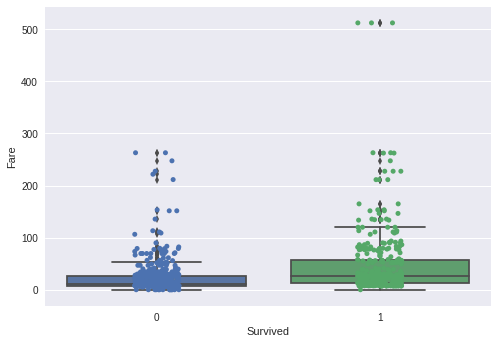

In [5]:
ax = sns.boxplot(x="Survived",y="Fare",data=titanic)
ax = sns.stripplot(x="Survived",y="Fare", data= titanic, jitter = True)
sns.plt.show()

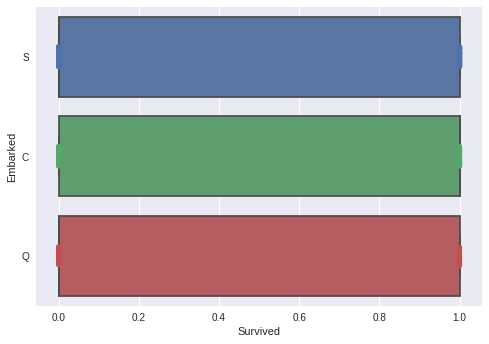

In [6]:
ax = sns.boxplot(x="Survived",y="Embarked",data=titanic)
ax = sns.stripplot(x="Survived",y="Embarked", data= titanic, jitter = True)
sns.plt.show()

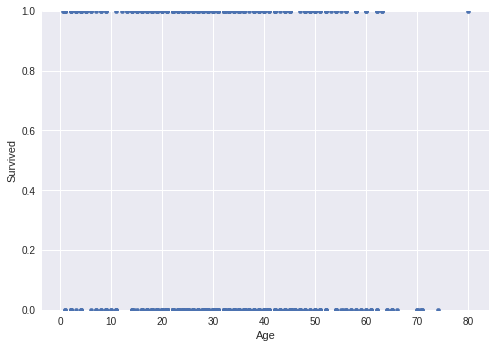

In [7]:
data =pd.concat([titanic["Survived"],titanic["Age"]], axis=1)
data.plot.scatter(x="Age",y="Survived", ylim = (0,1))

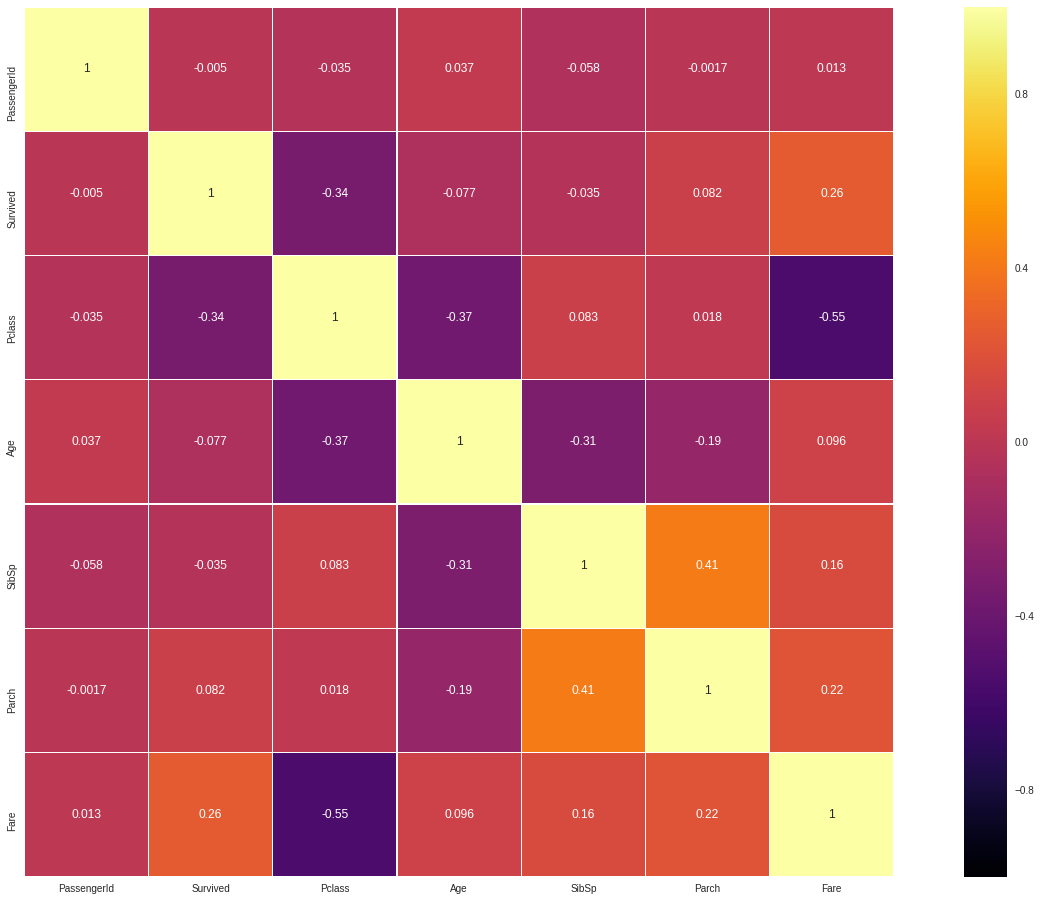

In [8]:
corr = titanic.corr()
f,ax = plt.subplots(figsize=(25,16))
sns.heatmap(corr,cmap='inferno',linewidth=0.1,vmax=1.0,square=True,annot=True)

In [9]:
titanic.describe()
titanic["Age"] = titanic["Age"].fillna(titanic["Age"].median())

In [10]:
print(titanic["Sex"].unique())
titanic.loc[(titanic["Sex"] == "male"),"Sex"] = 0
titanic.loc[(titanic["Sex"] == "female"),"Sex"] = 1

['male' 'female']


In [11]:
titanic["Embarked"] = titanic["Embarked"].fillna("S")

In [12]:
print(titanic["Embarked"].unique())
titanic.loc[titanic["Embarked"] == "S", "Embarked"] = 1
titanic.loc[titanic["Embarked"] == "C", "Embarked"] = 2
titanic.loc[titanic["Embarked"] == "Q", "Embarked"] = 3

['S' 'C' 'Q']


In [13]:
import numpy as np
import pandas as pd
titanic=pd.read_csv('../input/train.csv')
titanic_test = pd.read_csv('../input/test.csv')
titanic_test["Age"]= titanic_test["Age"].fillna(titanic["Age"].median())
titanic_test.loc[titanic_test["Sex"]=="male","Sex"] = 0
titanic_test.loc[titanic_test["Sex"]=="female","Sex"] = 1
titanic_test["Embarked"]= titanic_test["Embarked"].fillna("S")
titanic_test.loc[titanic_test["Embarked"] == "S","Embarked"] = 0
titanic_test.loc[titanic_test["Embarked"] == "C","Embarked"] = 1
titanic_test.loc[titanic_test["Embarked"] == "Q","Embarked"] = 2
titanic_test["Fare"]= titanic_test["Fare"].fillna(titanic_test["Fare"].median())

In [14]:
titanic["Embarked"] = titanic["Embarked"].fillna("S")

In [15]:
print(titanic["Sex"].unique())
titanic.loc[(titanic["Sex"] == "male"),"Sex"] = 0
titanic.loc[(titanic["Sex"] == "female"),"Sex"] = 1
print(titanic["Embarked"].unique())
titanic["Embarked"] = titanic["Embarked"].fillna("S")
titanic.loc[titanic["Embarked"] == "S", "Embarked"] = 0
titanic.loc[titanic["Embarked"] == "C", "Embarked"] = 1
titanic.loc[titanic["Embarked"] == "Q", "Embarked"] = 2

['male' 'female']
['S' 'C' 'Q']


In [16]:
predictors= ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]
print (titanic[predictors].iloc[0])
print (titanic["Survived"].iloc[0])
print (type(titanic[predictors].iloc[0]))
print (type(titanic["Survived"].iloc[0]))

Pclass         3
Sex            0
Age           22
SibSp          1
Parch          0
Fare        7.25
Embarked       0
Name: 0, dtype: object
0
<class 'pandas.core.series.Series'>
<class 'numpy.int64'>


In [17]:
titanic["Age"] = titanic["Age"].fillna(titanic["Age"].median())

In [18]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [19]:
predictors= ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]
lgr=LogisticRegression(random_state=1)
lgr.fit(titanic[predictors], titanic["Survived"])
prediction= lgr.predict(titanic_test[predictors]) 
scores = cross_validation.cross_val_score(lgr, titanic[predictors], titanic["Survived"], cv=3)
print(scores.mean())
submission = pd.DataFrame({
        "PassengerId": titanic_test["PassengerId"],
        "Survived": prediction
    }) 

0.787878787879


In [20]:
import numpy as np
import pandas as pd
from sklearn.cross_validation import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import cross_validation
predictors= ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]
rfc= RandomForestClassifier(random_state=1, n_estimators = 50, min_samples_split=4, min_samples_leaf=2)
kfr= cross_validation.KFold(titanic.shape[0], random_state=1, n_folds = 3)
scores= cross_validation.cross_val_score(rfc, titanic[predictors], titanic["Survived"], cv=kfr)
print (scores.mean())
submission = pd.DataFrame({
        "PassengerId": titanic_test["PassengerId"],
        "Survived": prediction
}) 
submission.to_csv("titanic_submission.csv", index=False)

0.81593714927


In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
clf_knn = KNeighborsClassifier(
    n_neighbors=10,
    weights='distance'
    )
clf_knn = clf_knn.fit(titanic[predictors],titanic["Survived"])
score_knn = cross_val_score(clf_knn,titanic[predictors],titanic["Survived"], cv=5).mean()
print(score_knn)

0.71276415559


In [22]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
predictors= ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]
clf = GradientBoostingClassifier(n_estimators=100, learning_rate = 1.0, max_depth=1)
clf.fit(titanic[predictors],titanic["Survived"])
score = cross_val_score(clf,titanic[predictors],titanic["Survived"],cv=5).mean()
print (score)
test_pred= clf.predict(titanic_test[predictors])
predictions = [(value for value in test_pred)]


0.811491116173


In [23]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeClassifier
predictors= ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]
dt = DecisionTreeClassifier()
dlf = AdaBoostClassifier(n_estimators=100, base_estimator = dt,learning_rate=1)
dlf.fit(titanic[predictors],titanic["Survived"])
score= cross_val_score(dlf,titanic[predictors],titanic["Survived"],cv=5).mean()
print(score)
test_pred= dlf.predict(titanic_test[predictors])


0.780086651935


genderclassmodel.csv
gendermodel.csv
gendermodel.py
myfirstforest.py
test.csv
train.csv



/opt/conda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa6d766f400>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fa6d72ddcf8>]], dtype=object)

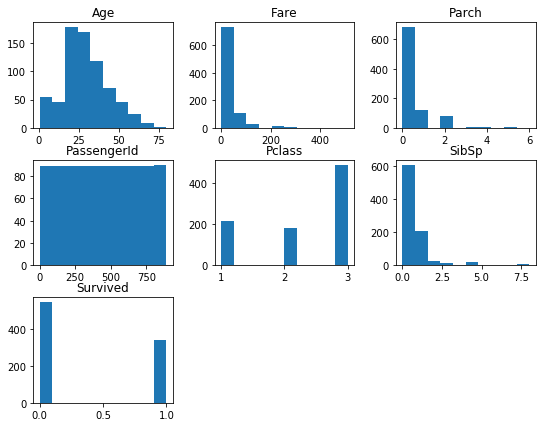

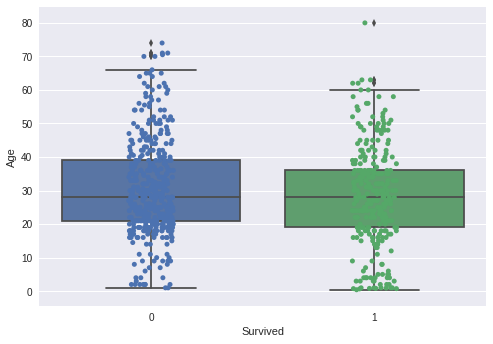

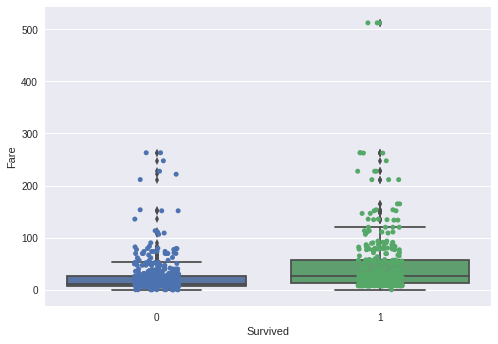

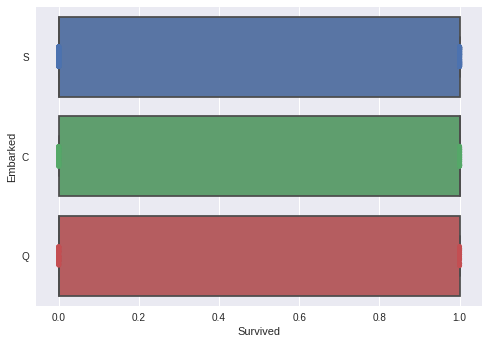

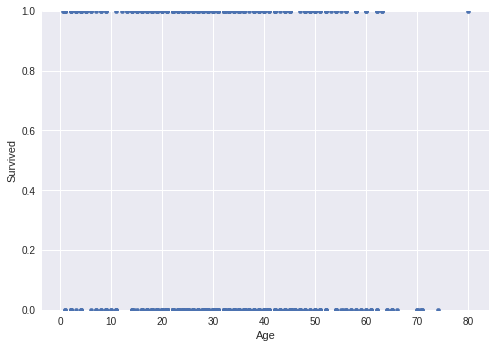

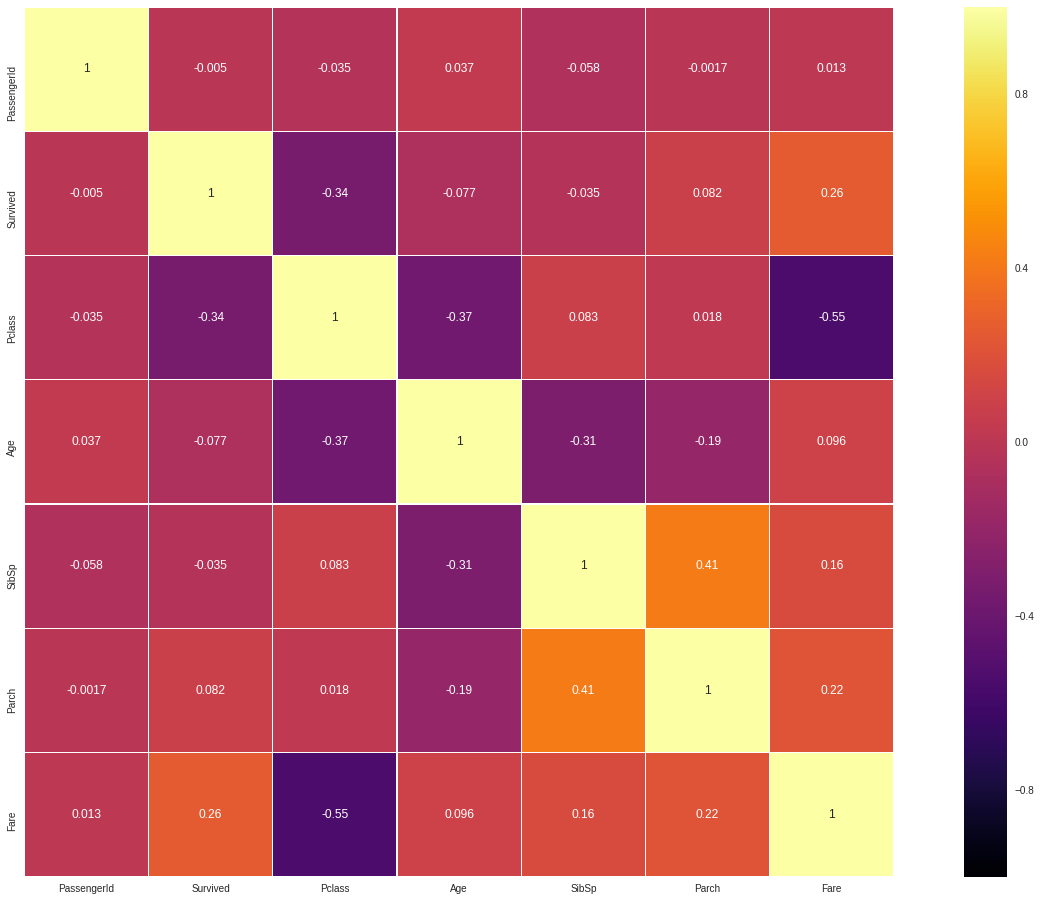

['male' 'female']


['S' 'C' 'Q']


['male' 'female']
['S' 'C' 'Q']


Pclass         3
Sex            0
Age           22
SibSp          1
Parch          0
Fare        7.25
Embarked       0
Name: 0, dtype: object
0
<class 'pandas.core.series.Series'>
<class 'numpy.int64'>


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


0.787878787879


0.81593714927


0.71276415559


0.811491116173


0.782346397086


0.787832343365


0.787832343365


In [24]:
from sklearn import svm
sv= svm.SVC(gamma='auto',kernel='linear', random_state=1,tol=0.0001,max_iter=-1)
sv.fit(titanic[predictors],titanic["Survived"])
score = cross_val_score(sv,titanic[predictors],titanic["Survived"],cv=5).mean()
print (score)